<a href="https://colab.research.google.com/github/Praneethamurala1214/AICTE/blob/main/Project_2_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, re, glob, math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import display

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv



--- RandomForest ---
Accuracy: 0.7205
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.86      0.79        97
           6       0.69      0.74      0.72        92
           7       0.74      0.48      0.58        29
           8       0.00      0.00      0.00         3

    accuracy                           0.72       229
   macro avg       0.36      0.35      0.35       229
weighted avg       0.69      0.72      0.70       229



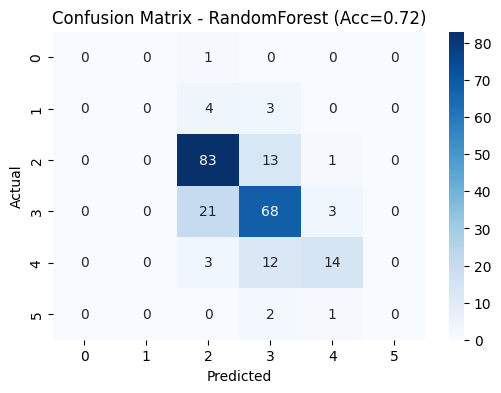


--- SGDClassifier ---
Accuracy: 0.5284
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.68      0.67      0.68        97
           6       0.52      0.37      0.43        92
           7       0.33      0.76      0.46        29
           8       0.00      0.00      0.00         3

    accuracy                           0.53       229
   macro avg       0.26      0.30      0.26       229
weighted avg       0.54      0.53      0.52       229



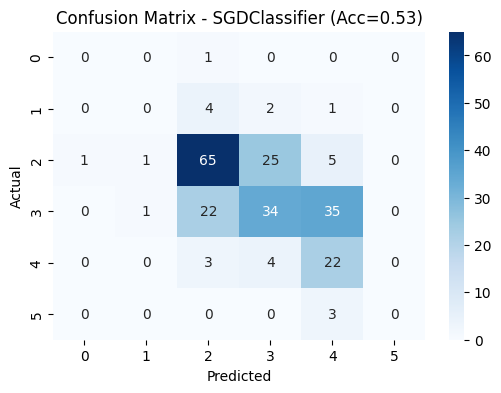


--- SVC ---
Accuracy: 0.6638
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.79      0.76        97
           6       0.61      0.72      0.66        92
           7       0.64      0.31      0.42        29
           8       0.00      0.00      0.00         3

    accuracy                           0.66       229
   macro avg       0.33      0.30      0.31       229
weighted avg       0.63      0.66      0.64       229



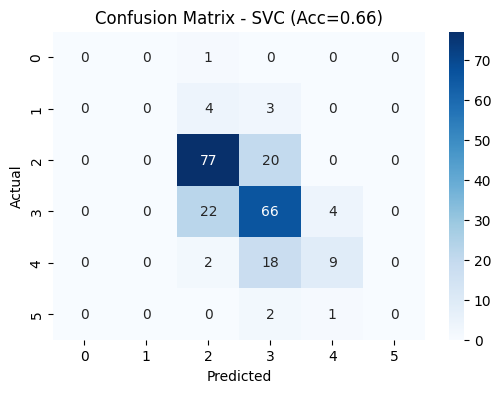

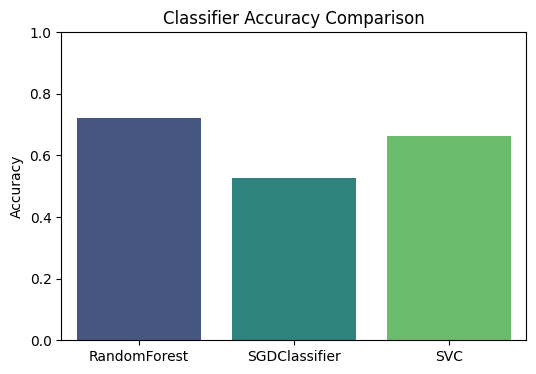

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("WineQT.csv")
if "Id" in df.columns:
    df.drop(columns=["Id"], inplace=True)
X = df.drop(columns=["quality"])
y = df["quality"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SGDClassifier": SGDClassifier(max_iter=1000, tol=1e-3, random_state=42),
    "SVC": SVC(kernel="rbf", probability=True, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n--- {name} ---")
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name} (Acc={acc:.2f})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Classifier Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


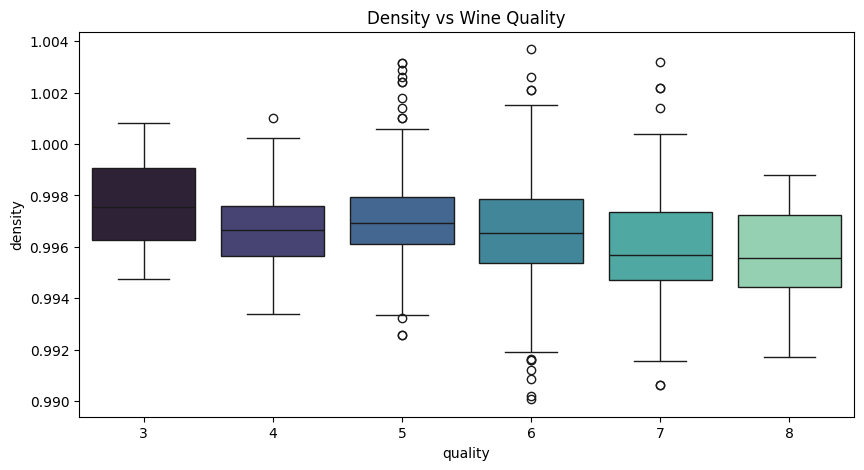

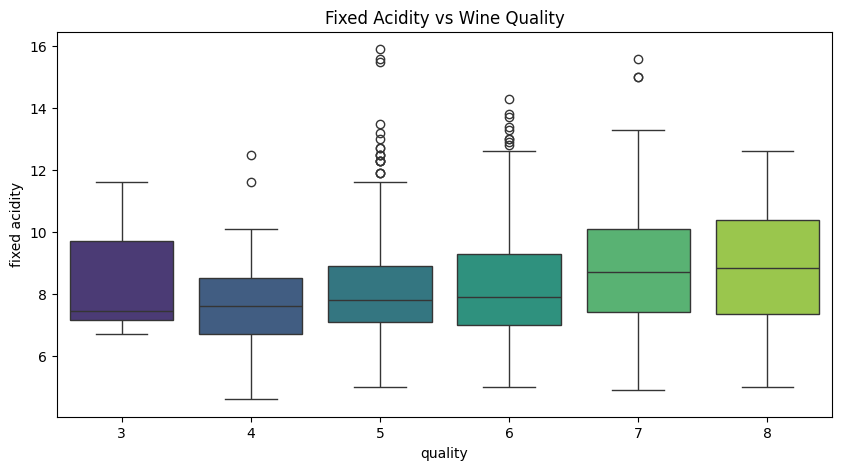

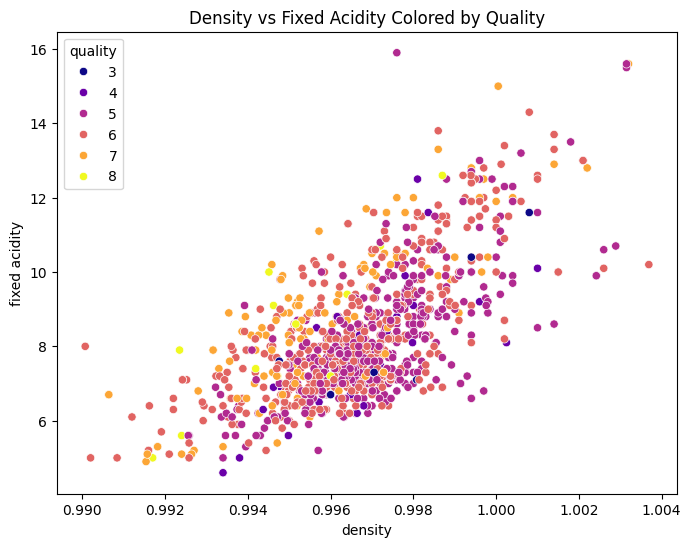

Accuracy: 0.524
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.58      0.70      0.64        97
           6       0.48      0.54      0.51        92
           7       0.25      0.07      0.11        29
           8       0.00      0.00      0.00         3

    accuracy                           0.52       229
   macro avg       0.22      0.22      0.21       229
weighted avg       0.47      0.52      0.49       229



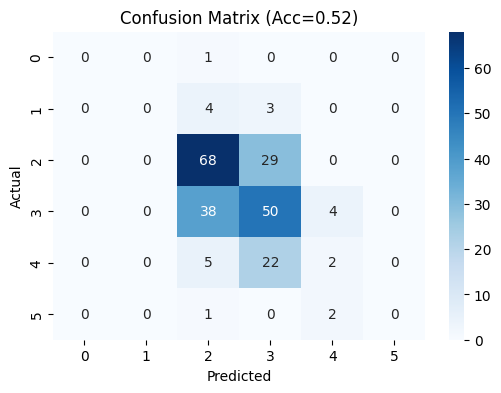

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("WineQT.csv")
if "Id" in df.columns:
    df.drop(columns=["Id"], inplace=True)
X = df[["density", "fixed acidity"]]
y = df["quality"]
plt.figure(figsize=(10,5))
sns.boxplot(x="quality", y="density", data=df, palette="mako")
plt.title("Density vs Wine Quality")
plt.show()
plt.figure(figsize=(10,5))
sns.boxplot(x="quality", y="fixed acidity", data=df, palette="viridis")
plt.title("Fixed Acidity vs Wine Quality")
plt.show()
plt.figure(figsize=(8,6))
sns.scatterplot(x="density", y="fixed acidity", hue="quality", data=df, palette="plasma")
plt.title("Density vs Fixed Acidity Colored by Quality")
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 4))
print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix (Acc={acc:.2f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Dataset shape: (1143, 12)

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

First 5 rows:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   


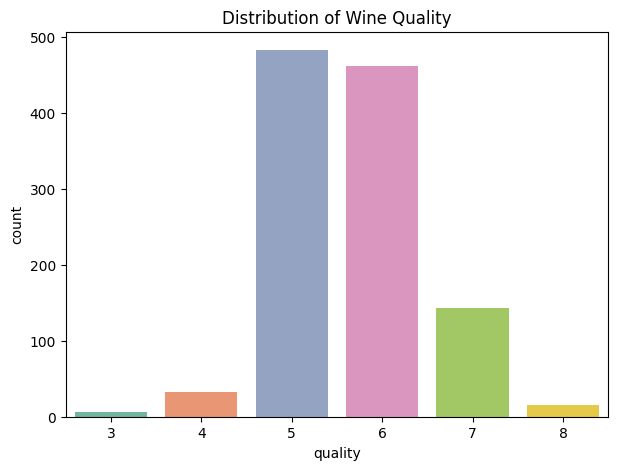

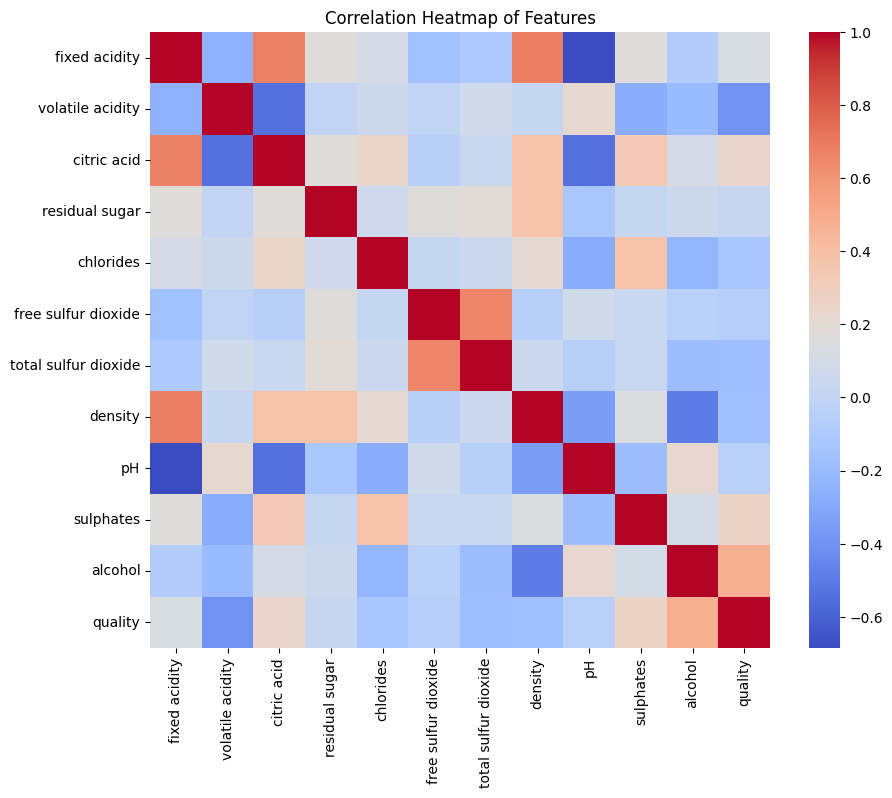

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("WineQT.csv")
if "Id" in df.columns:
    df.drop(columns=["Id"], inplace=True)
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nDescriptive Statistics (Pandas):\n", df.describe())
print("\nWine counts by quality:\n", df["quality"].value_counts())
X = df.drop(columns=["quality"]).values
y = df["quality"].values
print("\nNumpy - Shape of X:", X.shape)
print("Numpy - Mean alcohol:", np.mean(X[:, df.columns.get_loc("alcohol")]))
print("Numpy - Std of density:", np.std(X[:, df.columns.get_loc("density")]))
corr_matrix = np.corrcoef(X.T)
print("\nNumpy Correlation Matrix shape:", corr_matrix.shape)
plt.figure(figsize=(7,5))
sns.countplot(x="quality", data=df, palette="Set2")
plt.title("Distribution of Wine Quality")
plt.show()
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()


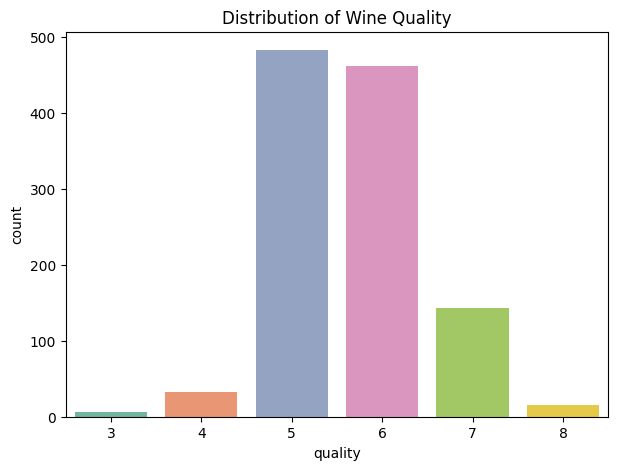

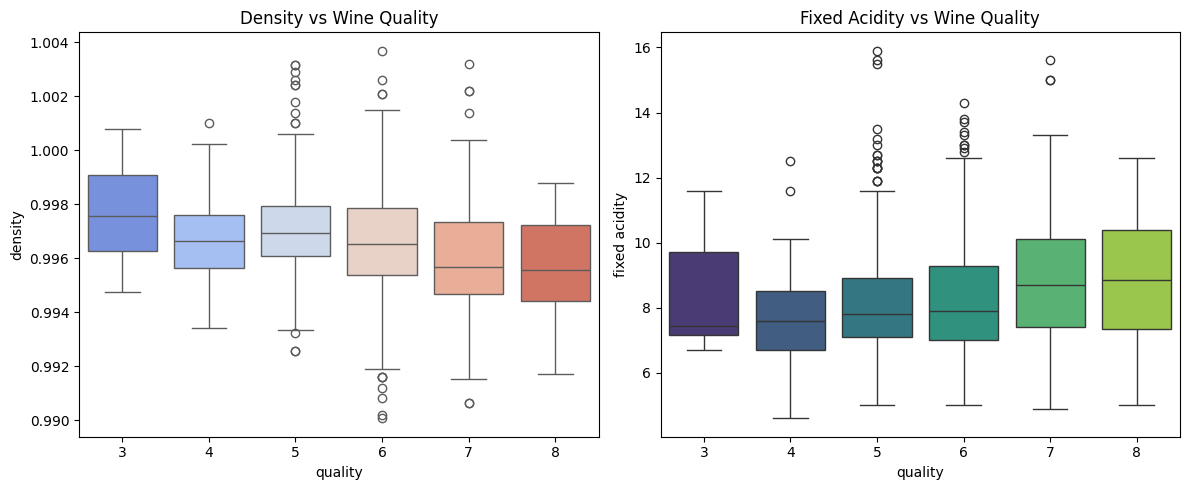

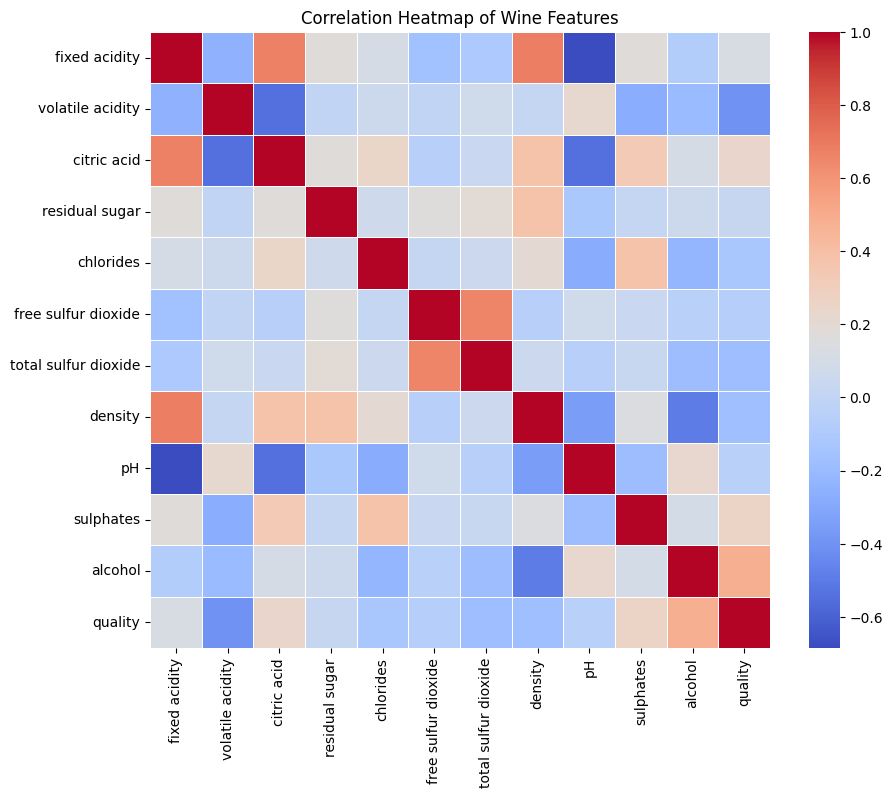

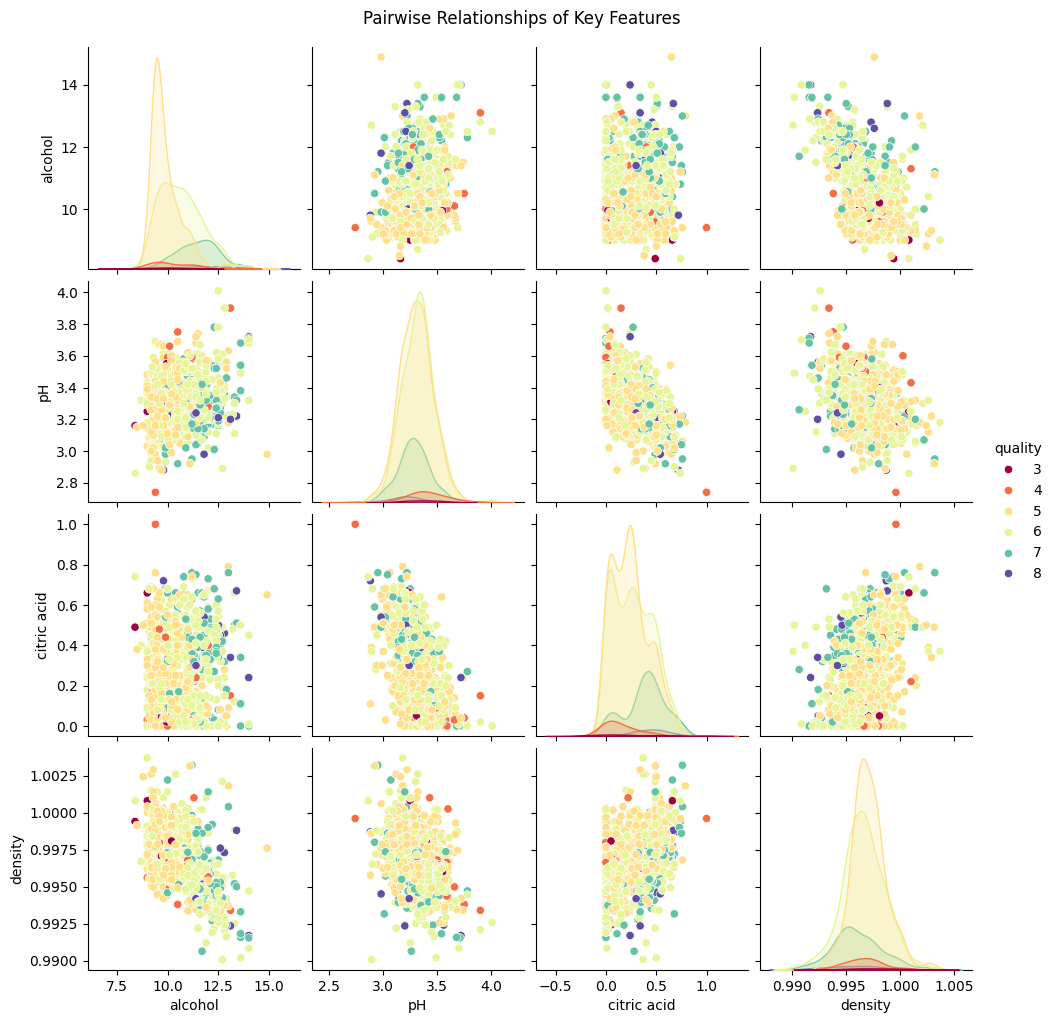

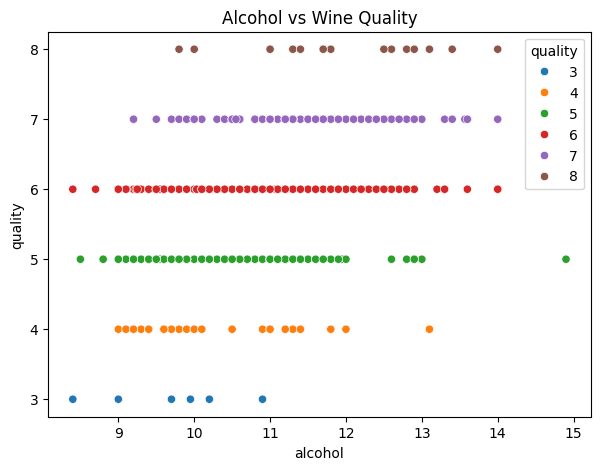

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("WineQT.csv")
if "Id" in df.columns:
    df.drop(columns=["Id"], inplace=True)
plt.figure(figsize=(7,5))
sns.countplot(x="quality", data=df, palette="Set2")
plt.title("Distribution of Wine Quality")
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x="quality", y="density", data=df, palette="coolwarm")
plt.title("Density vs Wine Quality")

plt.subplot(1,2,2)
sns.boxplot(x="quality", y="fixed acidity", data=df, palette="viridis")
plt.title("Fixed Acidity vs Wine Quality")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Wine Features")
plt.show()

sns.pairplot(df, vars=["alcohol","pH","citric acid","density"],
             hue="quality", palette="Spectral", diag_kind="kde")
plt.suptitle("Pairwise Relationships of Key Features", y=1.02)
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x="alcohol", y="quality", data=df, hue="quality", palette="tab10")
plt.title("Alcohol vs Wine Quality")
plt.show()
